In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import sys
sys.path.append("/binf-isilon/renniegrp/vpx267/ucph_thesis/")
from model import ConfigurableModel, ConfigurableModelWoBatchNorm, TestMotifModel
import logomaker
import os
from typing import Callable
from wrapper import utils
from wrapper.utils import one_hot, one_hot_to_sequence

##Loading Data Model from Saved Weight

In [77]:

# config = {"cnn_first_filter":16, "cnn_first_kernel_size":9, "cnn_length":3, "cnn_filter":32, "cnn_kernel_size":7, "bilstm_layer":3, "bilstm_hidden_size":128, "fc_size":64}
# model = ConfigurableModelWoBatchNorm(input_channel=4, cnn_first_filter=config["cnn_first_filter"], cnn_first_kernel_size=config["cnn_first_kernel_size"],
#                                 cnn_length=config["cnn_length"], cnn_other_filter=config["cnn_filter"], cnn_other_kernel_size=config["cnn_kernel_size"], bilstm_layer=config["bilstm_layer"], bilstm_hidden_size=config["bilstm_hidden_size"], fc_size=config["fc_size"],
#                                 output_size=1)


config = {'cnn_first_filter': 16, 'cnn_first_kernel_size': 9, 'cnn_length': 3, 'cnn_filter': 32, 'cnn_kernel_size': 7, 'bilstm_layer': 3, 'bilstm_hidden_size': 128, 'fc_size': 64}            
model = TestMotifModel(input_channel=4, cnn_first_filter=config["cnn_first_filter"], cnn_first_kernel_size=config["cnn_first_kernel_size"],
                        cnn_other_filter=config["cnn_filter"], cnn_other_kernel_size=config["cnn_kernel_size"], bilstm_layer=config["bilstm_layer"], bilstm_hidden_size=config["bilstm_hidden_size"], fc_size=config["fc_size"],
                        output_size=2)
#fold
fold = 1
# model_weight = torch.load(f"/binf-isilon/renniegrp/vpx267/ucph_thesis/data/outputs/models/trained_model_1th_fold_case_m6_info-no_promoter-False_wo_batch_norm_mse.pkl",
#                           map_location=torch.device('cpu'))
model_weight = torch.load(f"/binf-isilon/renniegrp/vpx267/ucph_thesis/data/outputs/models/trained_model_1th_fold_dual_outputs_m6_info-no_promoter-False_TEST_MOTIF.pkl",
                          map_location=torch.device('cpu'))
model.load_state_dict(model_weight)
model.eval()

for k, v in model_weight.items():
    print(k)

seq_fasta_test_path = f"/binf-isilon/renniegrp/vpx267/ucph_thesis/data/dual_outputs/motif_fasta_test_SPLIT_{fold}.fasta"
seq_fasta_one_hot = utils.create_seq_tensor(seq_fasta_test_path)

CNN.CNN_1.weight
CNN.CNN_1.bias
CNN.BATCHNORM_1.weight
CNN.BATCHNORM_1.bias
CNN.BATCHNORM_1.running_mean
CNN.BATCHNORM_1.running_var
CNN.BATCHNORM_1.num_batches_tracked
CNN.CNN_2.weight
CNN.CNN_2.bias
CNN.BATCHNORM_2.weight
CNN.BATCHNORM_2.bias
CNN.BATCHNORM_2.running_mean
CNN.BATCHNORM_2.running_var
CNN.BATCHNORM_2.num_batches_tracked
CNN.CNN_3.weight
CNN.CNN_3.bias
CNN.BATCHNORM_3.weight
CNN.BATCHNORM_3.bias
CNN.BATCHNORM_3.running_mean
CNN.BATCHNORM_3.running_var
CNN.BATCHNORM_3.num_batches_tracked
biLSTM.weight_ih_l0
biLSTM.weight_hh_l0
biLSTM.bias_ih_l0
biLSTM.bias_hh_l0
biLSTM.weight_ih_l0_reverse
biLSTM.weight_hh_l0_reverse
biLSTM.bias_ih_l0_reverse
biLSTM.bias_hh_l0_reverse
biLSTM.weight_ih_l1
biLSTM.weight_hh_l1
biLSTM.bias_ih_l1
biLSTM.bias_hh_l1
biLSTM.weight_ih_l1_reverse
biLSTM.weight_hh_l1_reverse
biLSTM.bias_ih_l1_reverse
biLSTM.bias_hh_l1_reverse
biLSTM.weight_ih_l2
biLSTM.weight_hh_l2
biLSTM.bias_ih_l2
biLSTM.bias_hh_l2
biLSTM.weight_ih_l2_reverse
biLSTM.weight_hh_l2_r

In [4]:
print(seq_fasta_one_hot.shape)

torch.Size([19136, 4, 1001])


## Plot First CNN Layer Logo

In [78]:
def forward_to_RELU_1(model, x):
    for i, layer in enumerate(model.CNN): # Assuming there is defined "self.CNN" layer
        print(layer)
        x = layer(x)
        if isinstance(layer, nn.ReLU): # If it reaches ReLU, return the output 
            return x

model.eval()
print("eval")
with torch.no_grad():
    first_layer_result = forward_to_RELU_1(model, seq_fasta_one_hot)
print("extract kernel_size")
kernel_size = model.CNN[0].kernel_size[0]

eval
Conv1d(4, 16, kernel_size=(9,), stride=(1,), padding=same)
ReLU()
extract kernel_size


In [79]:
first_cnn_weight = model_weight["CNN.CNN_1.weight"]
print(first_cnn_weight.shape) # (num_filter, 4, kernel_size)
print(first_cnn_weight)

torch.Size([16, 4, 9])
tensor([[[-7.8669e-02,  5.3153e-03, -5.5996e-02, -2.6684e-02, -2.3479e-01,
          -3.8661e-03, -3.2968e-02, -3.0178e-03,  8.9204e-03],
         [-3.5198e-02, -2.3625e-01, -5.1514e-02, -1.1974e-01,  1.2505e-01,
          -7.3383e-02, -9.0493e-03, -8.7171e-02, -3.1245e-03],
         [-6.2360e-02,  1.2119e-01,  3.8537e-02, -1.0049e-01, -3.8345e-02,
          -6.3786e-02,  4.1719e-02, -4.0707e-02, -1.4944e-03],
         [-3.7992e-02,  3.4081e-02, -1.5384e-01,  2.4561e-01, -2.1563e-01,
           1.1408e-01, -2.8455e-02,  6.9589e-02,  2.6082e-02]],

        [[-5.2696e-03,  7.1184e-02,  7.9575e-02, -9.6956e-02, -4.5267e-02,
          -8.3724e-02, -1.1889e-02,  5.1387e-02,  1.1319e-02],
         [ 7.3572e-02, -5.0781e-02,  8.4979e-02,  1.7505e-01,  2.0523e-01,
           1.5531e-01,  8.7124e-02,  6.9636e-02,  5.9492e-02],
         [ 1.4025e-01,  1.2002e-03, -1.4008e-01, -6.0462e-02, -1.2693e-01,
          -7.0025e-02,  2.1341e-02,  1.2565e-02, -3.4727e-02],
         

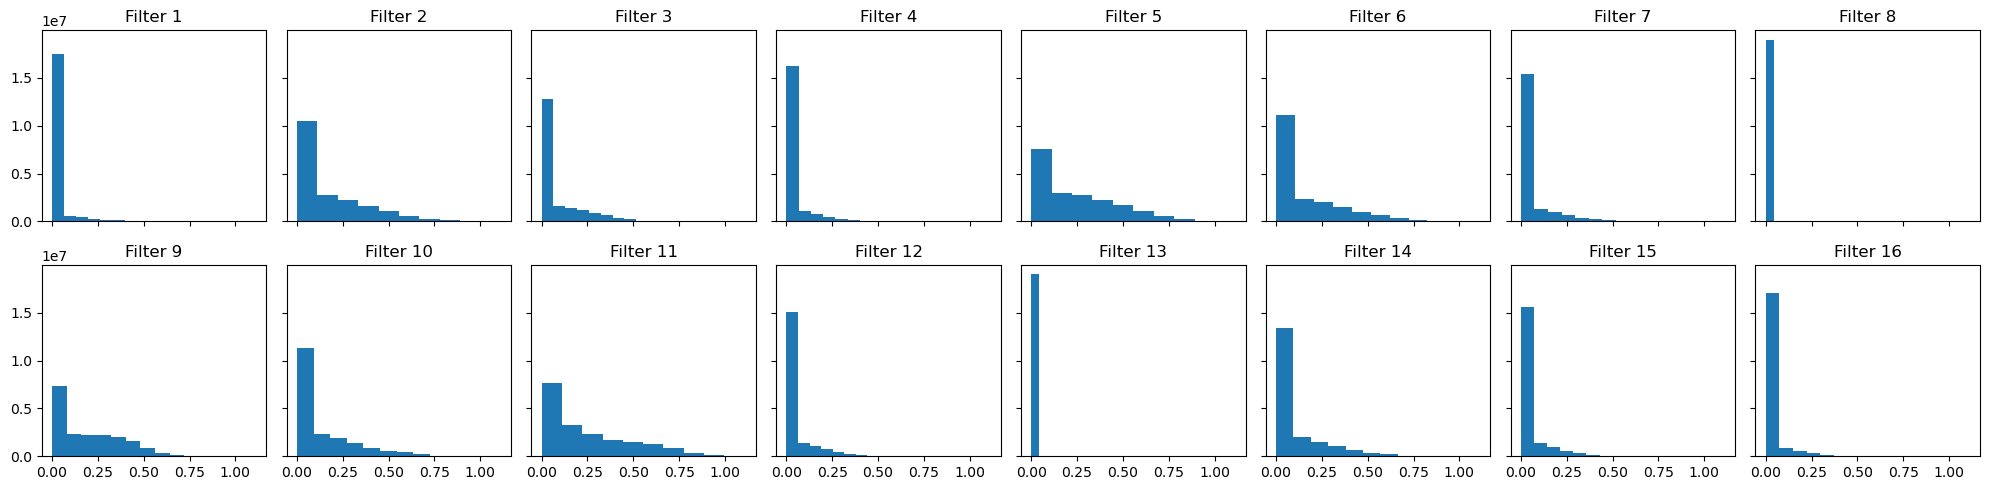

In [80]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

temp = first_layer_result.transpose(1,2)

fig, axs = plt.subplots(2, 8, sharey=True, sharex=True, tight_layout=True, figsize=(20, 5))

for i in range (0, 16):
    axs[i // 8, i % 8].title.set_text(f"Filter {i+1}")
    axs[i // 8, i % 8].hist(temp[:,:,i].flatten().detach().cpu().numpy())


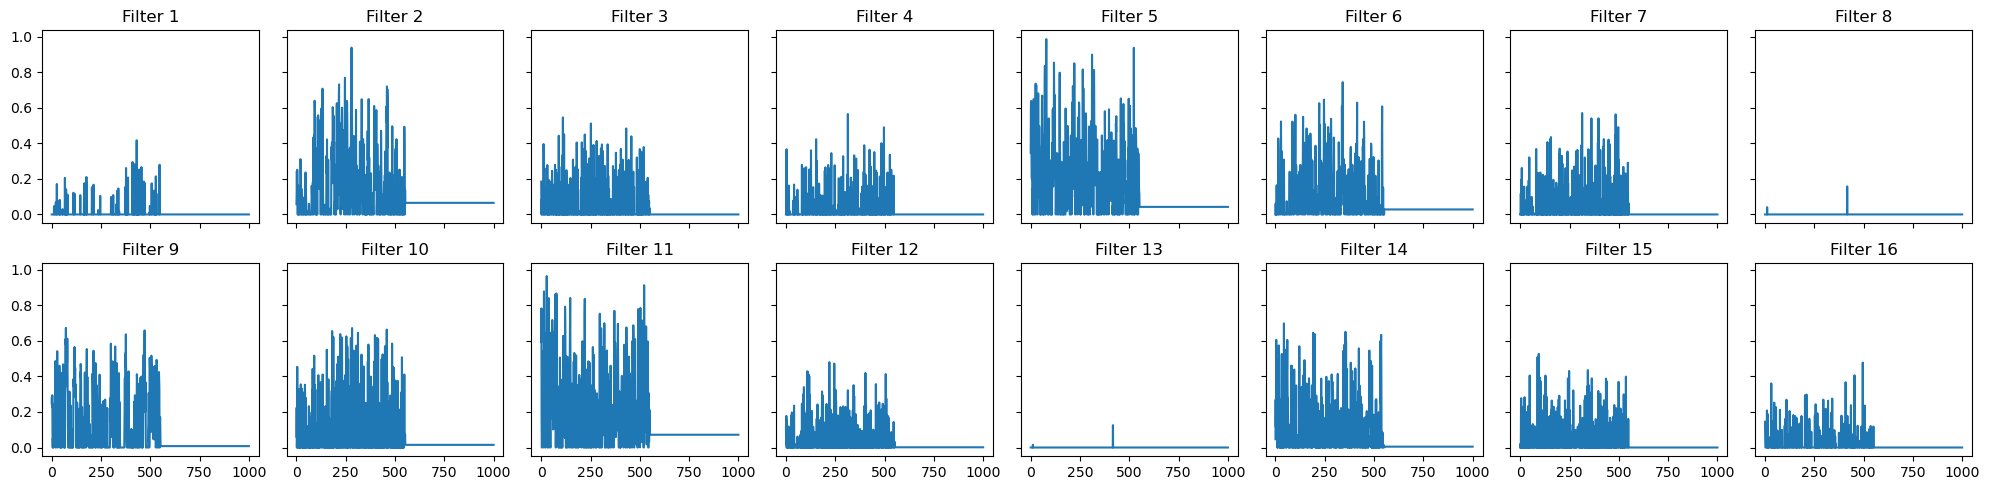

In [81]:

temp2 = first_layer_result.transpose(1,2)[0,:,:].detach().cpu().numpy()

fig, axs = plt.subplots(2, 8, sharey=True, sharex=True, tight_layout=True, figsize=(20, 5))

for i in range (0, 16):
    axs[i // 8, i % 8].title.set_text(f"Filter {i+1}")
    axs[i // 8, i % 8].plot(np.arange(0,len(temp2[:,i])),temp2[:,i] )

In [85]:
filter_index = 0
coba = first_layer_result.transpose(1,2).detach().cpu().numpy()
# print the max value for each sequence
max_each_seq = np.max(coba[:, :, filter_index], axis=1)

# print(max_each_seq)
argmax_idx = np.argmax(coba[:, :, filter_index], axis=1)
#Sanity check of max value. It should be the same as the max value printed above
# print(coba[0, argmax_idx, filter_index])

print(coba.shape)
# We want to reorder the sequence based on their respective max value
print(np.sort(max_each_seq).shape) # Will print the ordere maximum VALUES For each sequence  
sorted_seq_idx = np.argsort(max_each_seq)
seq_size = sorted_seq_idx.shape[0]
i=1
selected_idx = []
while(i<=2000 and i<seq_size):
    # Descending
    selected_idx.append(sorted_seq_idx[-i])
    i+=1
selected_idx = np.array(selected_idx)
print(f"Selected index {selected_idx} its shape {selected_idx.shape}")
max_indexes = np.argmax(coba[list(selected_idx),:,filter_index], axis = 1)
print(max_indexes)
print(np.max(coba[[2746],:,filter_index], axis = 1))
print(np.argmax(coba[[2746],:,filter_index], axis = 1))
# print(np.argmax(coba[list(selected_idx),:,filter_index], axis = 1))
# print(np.argmax(coba[selected_idx[0],:,filter_index]))


(19136, 1001, 16)
(19136,)
Selected index [ 9906 18426 14972 ... 16657  2830    26] its shape (2000,)
[  3   3 408 ... 422  90 193]
[0.44188708]
[196]


In [86]:


temp = "ACGTA"
temp_one_hot = one_hot(temp).T
print(temp_one_hot)
temp_converted_back = one_hot_to_sequence(temp_one_hot)
print(temp_converted_back)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
ACGTA


In [87]:
def activation_pfm(layer_output: torch.Tensor, one_hot_selected_sequence_idx: torch.Tensor, window: int=9, threshold: float=0.5) -> np.ndarray:
    """
    Compute the Position Frequency Matrix (PFM) from a given torch layer output and one-hot-encoded selected_sequence_idx. Details are explained on the DeepBind supplementary material (10.2 Sequence logos). 
    
    input: layer_output: torch.Tensor, shape: ([batch, seq_length_out, num_cnn_layers])
    input: one_hot_sequence: torch.Tensor, shape: ([batch, seq_length, 4])
    input: window: int, size of the activation window (default 9)
    input: threshold: float, threshold to consider an activation (default 0.5)

    return: PFM: np.array, shape: ([num_filter_layer_output, window, 4])
    """
    input = layer_output.detach().cpu().numpy() # ([batch, seq_length_out, num_cnn_layers])
    X = one_hot_selected_sequence_idx.detach().cpu().numpy() # ([batch, seq_length, 4])

    seq_length = X.shape[1]
    pfm = []
    seq_align_one_hot=[]
    seq_align_text=[]
    window_left = int(window/2)
    window_right = window - window_left
    # Looping through all kernels -> np(batch,seq_length)
    for filter_index in range(input.shape[2]):
        # Get the maximum score for each selected_sequence_idx
        max_each_seq = np.max(input[:, :, filter_index], axis=1) #[batch]
        sorted_seq_idx = np.argsort(max_each_seq) #[batch], in ascending order

        # Get the descending order of the sequence index for top 2000 (or less if it's not enough)
        seq_size = sorted_seq_idx.shape[0]
        sort_idx=1
        selected_sequence_idx = []
        while(sort_idx<=1000 and sort_idx<seq_size):
            # Descending
            selected_sequence_idx.append(sorted_seq_idx[-sort_idx])
            sort_idx+=1
        selected_sequence_idx = np.array(selected_sequence_idx)
        temp_seq_align_one_hot = []
        tem_seq_align_text = []
        if len(selected_sequence_idx)>0:
            print(f"Processing filter: {filter_index}")
            max_indexes = np.argmax(input[list(selected_sequence_idx),:,filter_index], axis = 1) # [batch, seq_lengt] extract max position for each sequence
            # print(f"selected_sequence_idx : {selected_sequence_idx[0:5]}, max_indexes : {max_indexes[0:5]}")
            for seq_index, max_index in zip(selected_sequence_idx, max_indexes):
                start_window = int(max_index)
                end_window = int(max_index) + window 
                if end_window > seq_length:
                    # print("brek length, pass")
                    continue
                else : 
                    seq = X[seq_index, start_window:end_window, :] # select the one-hot encoded sequence based on the index
                    temp_seq_align_one_hot.append(seq)
                    tem_seq_align_text.append(one_hot_to_sequence(seq))
                # print(f"one hto seq : {seq}, seq text: {one_hot_to_sequence(seq)}")
                # print(seq)
                # print(one_hot_to_sequence(seq))   
            # print(f"shape of temp align: {np.array(temp_seq_align_one_hot).shape}")
            pfm.append(np.sum(np.array(temp_seq_align_one_hot), axis=0)) # create Position Frequency Matrix, summin over all selected_sequence_idx(batch)

            seq_align_one_hot.append(np.array(temp_seq_align_one_hot))
            seq_align_text.append(np.array(tem_seq_align_text))
        else:
            # If no sequence pass the threshold on a filter, add a zero matrix
            print("No sequence pass the threshold. Adding zero matrix")
            pfm.append(np.zeros((window, 4)))
            seq_align_one_hot.append(np.zeros((window, 4)))
            seq_align_text.append(np.array("N"*window))
    print(np.array(seq_align_text[0]).shape)
    return np.array(pfm), seq_align_text, seq_align_one_hot

In [88]:
# need to transpose to have the right shape for pfm calculation
pfm, seqs_text, seqs_one_hot = activation_pfm(first_layer_result.transpose(1,2).detach().cpu(),
                     seq_fasta_one_hot.transpose(1,2).detach().cpu(),
                     window=8, threshold=0.75)
print(pfm.shape)

Processing filter: 0
Processing filter: 1
Processing filter: 2
Processing filter: 3
Processing filter: 4
Processing filter: 5
Processing filter: 6
Processing filter: 7
Processing filter: 8
Processing filter: 9
Processing filter: 10
Processing filter: 11
Processing filter: 12
Processing filter: 13
Processing filter: 14
Processing filter: 15
(992,)
(16, 8, 4)


In [89]:

# print(seqs_text.shape)
# print(seqs_text[0][0])
for filter_idx, filter_seq in enumerate(seqs_text):
    print(filter_idx) 
    print(filter_seq.shape)
    # for i, seq in enumerate(filter_seq): 
    #     print(i)
    #     print(seq)

0
(992,)
1
(993,)
2
(998,)
3
(998,)
4
(994,)
5
(999,)
6
(998,)
7
(997,)
8
(993,)
9
(997,)
10
(998,)
11
(999,)
12
(990,)
13
(993,)
14
(998,)
15
(991,)


In [90]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

for filter_idx, filter_seq in enumerate(seqs_text):
    seq_records = [SeqRecord(Seq(seq), id=f"filter_id={filter_idx}|seq{i+1}", description="") for i, seq in enumerate(filter_seq)]
    SeqIO.write(seq_records, f"sequence_filter_{filter_idx}.fasta", "fasta")

In [168]:
seqs_text[0]

array(['CACTGAAA', 'TCATAGGT', 'CCAGGACA', ..., 'ATAACTCT', 'ATGAGCAC',
       'CCTTCCAG'], dtype='<U8')

In [92]:
def plot_motifs_from_pfm(pfm: np.ndarray, out_dir: str, file_name: str, interactive: bool=True) -> None:
    """
    Plot motifs from Position Frequency Matrix.
    modified from https://github.com/p-koo/learning_sequence_motifs/blob/master/code/deepomics/visualize.py

    input: pfm: np.ndarray, shape: ([num_filter_layer_output, window, 4])
    input: out_dir: str, output directory
    input: file_name: str, output file name
    """
    fig = plt.figure(figsize=(30,10))
    fig.suptitle("Learned Motifs from The First Layer of CNN", fontsize=20)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    num_filters = pfm.shape[0]
    num_cols = 5
    num_rows = int(np.ceil(num_filters/num_cols))
    for n, f in enumerate(pfm):
        # f in [window.4] shape
        ax = fig.add_subplot(num_rows, num_cols, n+1)
        # IC is the information content
        # calculated from relative entropy: \sum{bases}p(a)log_{2}\frac{p(a), background_freq(a)}
        # which is the same as \sum{bases}p(a)log_{2}{p(a)} + log_{2}{4}, assuming a uniform background distribution 
        n_bases = 4
        pfm_sum = np.sum(f, axis=1, keepdims=True)
        ppm = f / pfm_sum # calculating PPM
        IC = np.log2(n_bases) + np.sum(ppm * np.log2(ppm+1e-8), axis=1, keepdims=True) # avoid log(0) by add small value
        print(np.sum(IC))
        logo = IC*ppm 

        counts_df = pd.DataFrame(data=logo, columns=list("ACGT"))

        logomaker.Logo(counts_df, ax=ax)
        ax = plt.gca()
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.yaxis.set_ticks_position("none")
        ax.xaxis.set_ticks_position("none")
        plt.title(f"FILTER {n+1}")
        plt.xticks([])
        plt.yticks([])

    if interactive:
        plt.show()
    else:
        if not os.path.exists(out_dir):
            os.makedirs(out_dir)
        outfile = os.path.join(out_dir, f"{file_name}.pdf")
        fig.savefig(outfile, format="pdf", dpi=200, bbox_inches="tight")
        plt.close(fig)

7.8479486
7.3038335
9.662587
6.9049134
9.28063
10.409521
8.247588
7.762326
7.9939375
9.204508
5.9096317
9.448934
8.363882
9.430511
5.1270137
4.2719088


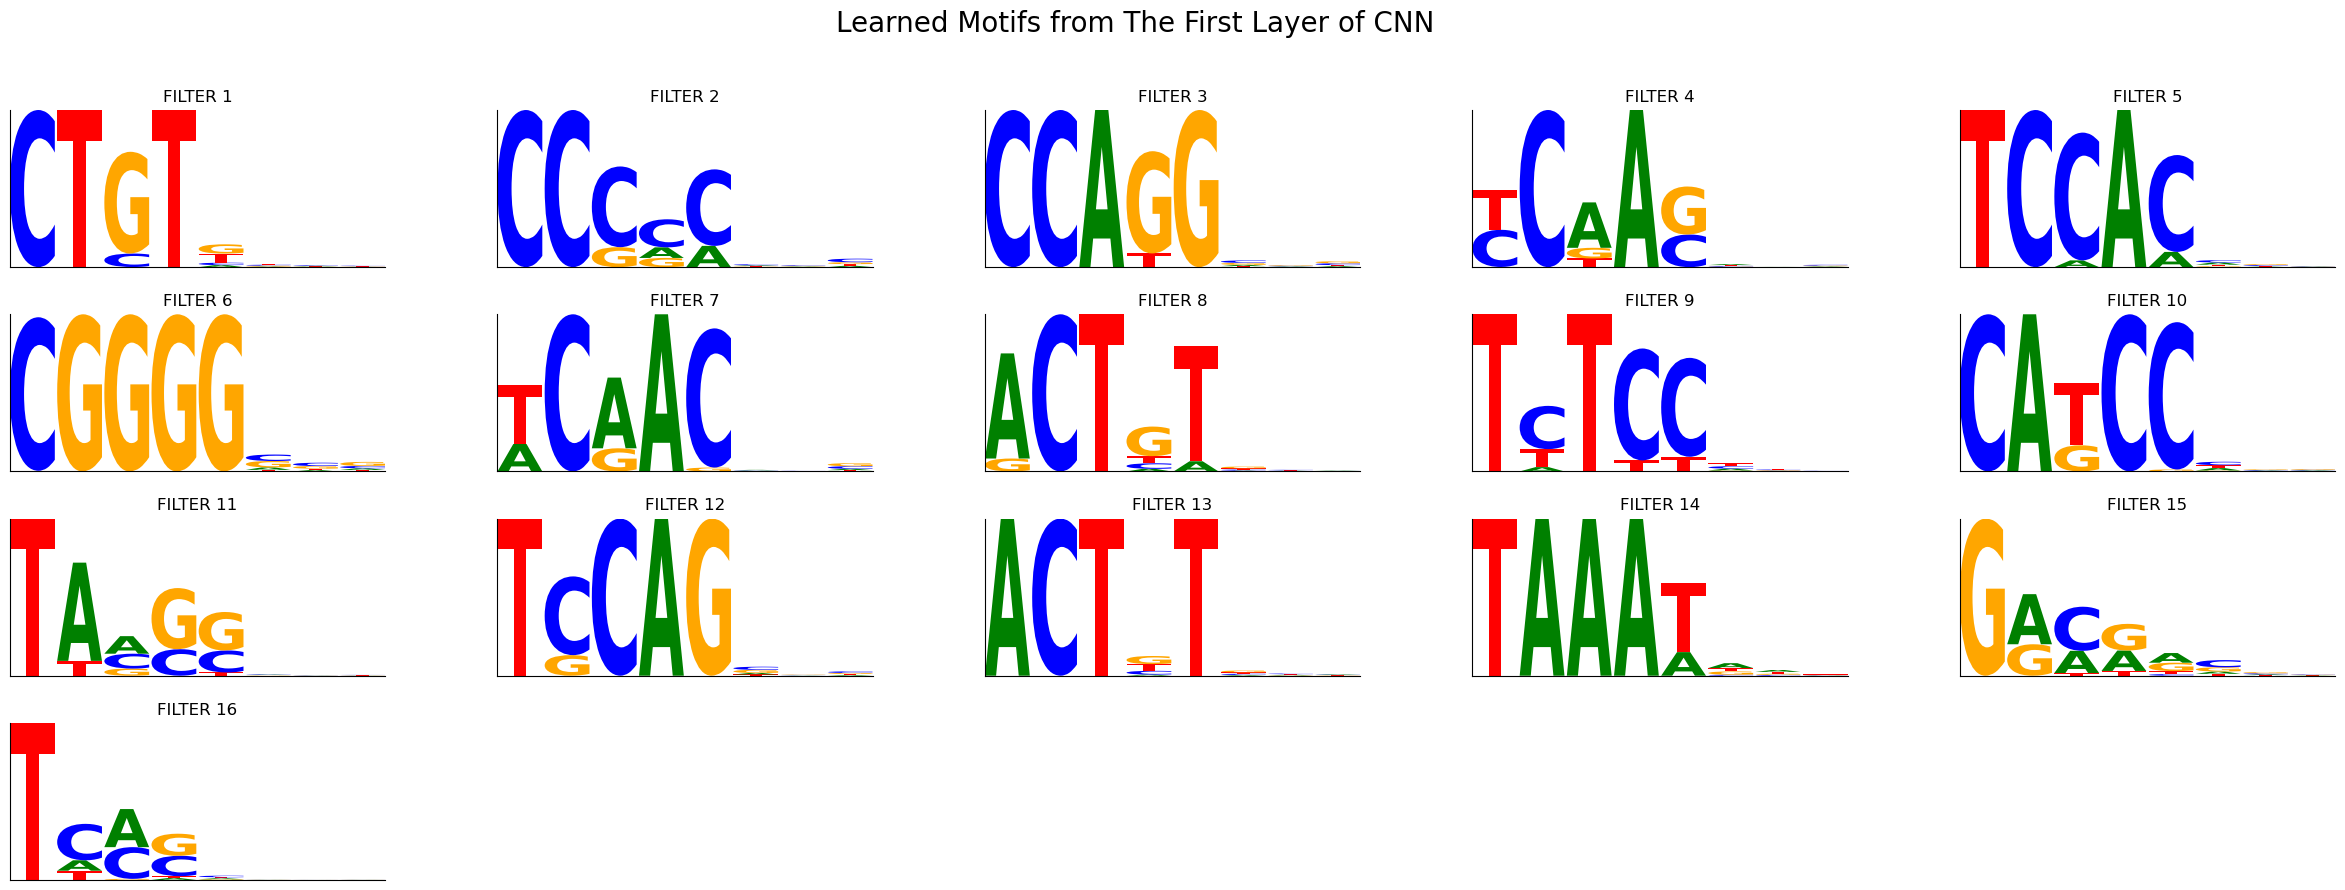

In [103]:
plot_motifs_from_pfm(pfm, "/binf-isilon/renniegrp/vpx267/ucph_thesis/data/outputs/analysis", "test_logo", interactive=True)

## Plot Logo from Integrated Gradient 

In [98]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import sys
sys.path.append("../")
from model import ConfigurableModel
import time
import logomaker
import os
from typing import Callable
import gc
from captum.attr import IntegratedGradients


# config = {"cnn_first_filter":16, "cnn_first_kernel_size":9, "cnn_length":3, "cnn_filter":32, "cnn_kernel_size":7, "bilstm_layer":3, "bilstm_hidden_size":128, "fc_size":64}
# model = ConfigurableModelWoBatchNorm(input_channel=4, cnn_first_filter=config["cnn_first_filter"], cnn_first_kernel_size=config["cnn_first_kernel_size"],
#                                 cnn_length=config["cnn_length"], cnn_other_filter=config["cnn_filter"], cnn_other_kernel_size=config["cnn_kernel_size"], bilstm_layer=config["bilstm_layer"], bilstm_hidden_size=config["bilstm_hidden_size"], fc_size=config["fc_size"],
#                                 output_size=1)


config = {'cnn_first_filter': 16, 'cnn_first_kernel_size': 9, 'cnn_length': 3, 'cnn_filter': 32, 'cnn_kernel_size': 7, 'bilstm_layer': 3, 'bilstm_hidden_size': 128, 'fc_size': 64}            
model = TestMotifModel(input_channel=4, cnn_first_filter=config["cnn_first_filter"], cnn_first_kernel_size=config["cnn_first_kernel_size"],
                        cnn_other_filter=config["cnn_filter"], cnn_other_kernel_size=config["cnn_kernel_size"], bilstm_layer=config["bilstm_layer"], bilstm_hidden_size=config["bilstm_hidden_size"], fc_size=config["fc_size"],
                        output_size=2)
#fold
fold = 1
# model_weight = torch.load(f"/binf-isilon/renniegrp/vpx267/ucph_thesis/data/outputs/models/trained_model_1th_fold_case_m6_info-no_promoter-False_wo_batch_norm_mse.pkl",
#                           map_location=torch.device('cpu'))
model_weight = torch.load(f"/binf-isilon/renniegrp/vpx267/ucph_thesis/data/outputs/models/trained_model_1th_fold_dual_outputs_m6_info-no_promoter-False_TEST_MOTIF.pkl",
                          map_location=torch.device('cpu'))
model.load_state_dict(model_weight)
model.eval()

for k, v in model_weight.items():
    print(k)
meta_data_test_json_path = f"/binf-isilon/renniegrp/vpx267/ucph_thesis/data/dual_outputs/test_meta_data_SPLIT_{fold}.json"
seq_fasta_test_path = f"/binf-isilon/renniegrp/vpx267/ucph_thesis/data/dual_outputs/motif_fasta_test_SPLIT_{fold}.fasta"
seq_fasta_one_hot = utils.create_seq_tensor(seq_fasta_test_path)

/binf-isilon/renniegrp/vpx267/miniconda3/envs/thesis_ray_gpu/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


CNN.CNN_1.weight
CNN.CNN_1.bias
CNN.BATCHNORM_1.weight
CNN.BATCHNORM_1.bias
CNN.BATCHNORM_1.running_mean
CNN.BATCHNORM_1.running_var
CNN.BATCHNORM_1.num_batches_tracked
CNN.CNN_2.weight
CNN.CNN_2.bias
CNN.BATCHNORM_2.weight
CNN.BATCHNORM_2.bias
CNN.BATCHNORM_2.running_mean
CNN.BATCHNORM_2.running_var
CNN.BATCHNORM_2.num_batches_tracked
CNN.CNN_3.weight
CNN.CNN_3.bias
CNN.BATCHNORM_3.weight
CNN.BATCHNORM_3.bias
CNN.BATCHNORM_3.running_mean
CNN.BATCHNORM_3.running_var
CNN.BATCHNORM_3.num_batches_tracked
biLSTM.weight_ih_l0
biLSTM.weight_hh_l0
biLSTM.bias_ih_l0
biLSTM.bias_hh_l0
biLSTM.weight_ih_l0_reverse
biLSTM.weight_hh_l0_reverse
biLSTM.bias_ih_l0_reverse
biLSTM.bias_hh_l0_reverse
biLSTM.weight_ih_l1
biLSTM.weight_hh_l1
biLSTM.bias_ih_l1
biLSTM.bias_hh_l1
biLSTM.weight_ih_l1_reverse
biLSTM.weight_hh_l1_reverse
biLSTM.bias_ih_l1_reverse
biLSTM.bias_hh_l1_reverse
biLSTM.weight_ih_l2
biLSTM.weight_hh_l2
biLSTM.bias_ih_l2
biLSTM.bias_hh_l2
biLSTM.weight_ih_l2_reverse
biLSTM.weight_hh_l2_r

In [102]:
# Get 100 smalles MSE sequences from test set
from torch.utils.data import DataLoader
from wrapper.data_setup import SequenceDatasetDual

test_dataset = SequenceDatasetDual(seq_fasta_path=seq_fasta_test_path, meta_data_path=meta_data_test_json_path)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


device = (torch.device("cuda") if torch.cuda.is_available()
            else torch.device("cpu"))
model.to(device)
model.eval()

pred= torch.Tensor().to("cpu", non_blocking=True)
true = torch.Tensor().to("cpu", non_blocking=True)

for data in test_loader:
    seq = data["seq"].to(device, non_blocking=True)
    meth_true_val = torch.stack([data[f"meth_control"].to(device, non_blocking=True), 
                                    data[f"meth_case"].to(device, non_blocking=True)], dim=1)
    meth_pred_val = model(seq)
    pred = torch.cat([pred, meth_true_val.cpu().detach()])
    true = torch.cat([true, meth_pred_val.cpu().detach()])

true_control = true[:,0]
true_case = true[:,1]
pred_control = pred[:,0]
pred_case = pred[:,1]

del pred, true
model.cpu()

control_mse = ((true_control - pred_control)**2)
_, ctrl_idx = torch.sort(control_mse, descending=False)
case_mse = ((true_case - pred_case)**2)
_, case_idx = torch.sort(case_mse, descending=False)
# Extracting top 100 sequences
top_100_ctrl = seq_fasta_one_hot[ctrl_idx[:100],:,:]
top_100_case = seq_fasta_one_hot[case_idx[:100],:,:]


IndexError: index 19136 is out of bounds for dimension 0 with size 19136

In [ ]:
def random_baseline_integrated_gradients(inputs: torch.Tensor, model: torch.nn.Module, index: int, steps: int, num_random_trials: int, cuda=True, batch=None) -> np.ndarray:
    """

    param: inputs: torch.Tensor: input tensor
    param: model: torch.nn.Module: model
    param: index: int: index of the target label (0 (control) or 1 (case))
    param: steps: int: Riemann approx for IG integral
    param: num_random_trials: int: number of random trials 
    param: cuda: bool: use cuda or not
    param: batch: int: batch size for internal batch size for captum IG
    return: np.ndarray: integrated gradients

    Can't process all due to memory and it is also not necessary to get the motif from low importance sequences
    === NOTES: EXPECTED ROUNDING DIFFERENT FOR SMALL NUMBER. PLEASE USE GPU FOR PERFORMANCE WISE ===
    """

    try:
        all_intgrads = []
        length = inputs.shape[-1]        # input shape [1,4,length]
        baseline = torch.FloatTensor(np.zeros(inputs.shape))
        model.eval()
        if cuda:
            # To enable backward for RNN in pytorch where device is GPU or CUDA. Known issue here: https://github.com/pytorch/captum/issues/564
            torch.backends.cudnn.enabled=False
            # Run dummy forward first 
            _ = model(torch.rand((1,4,1001)))
            # Hard coded device ids. should be changed to more general
            # model = nn.DataParallel(model.cuda(), device_ids=[0,1,2,3])
            # use all GPUs
            model = nn.DataParallel(model.cuda())
            baseline = baseline.to('cuda')
            inputs = inputs.to('cuda')
        else:
            model.cpu()
        for i in range(num_random_trials):
            ig = IntegratedGradients(model)
            integrated_grad = ig.attribute(inputs=inputs, internal_batch_size=batch, baselines=baseline, target=index, n_steps=steps)
            all_intgrads.append(integrated_grad.detach().cpu() if cuda else integrated_grad.detach())
            # print('the trial number is: {}'.format(i))
        avg_intgrads = np.average(np.array(all_intgrads), axis=0)
    finally:
        if cuda:
            torch.cuda.empty_cache() 
            model.cpu() 
            del baseline
            del inputs
            gc.collect()
    return avg_intgrads

In [ ]:
# Can't process all due to memory and it is also not necessary to get the motif from low importance sequences
# For 100 sequences it took ~1 minute
# # Index = 0 -> control
IG = random_baseline_integrated_gradients(inputs=top_100_ctrl, model=model, index=0, steps=50, num_random_trials=10)

plot_matrix = np.average(np.multiply(top_100_ctrl, IG), axis=0)
df = pd.DataFrame(plot_matrix.T, columns=list("ACGT"))

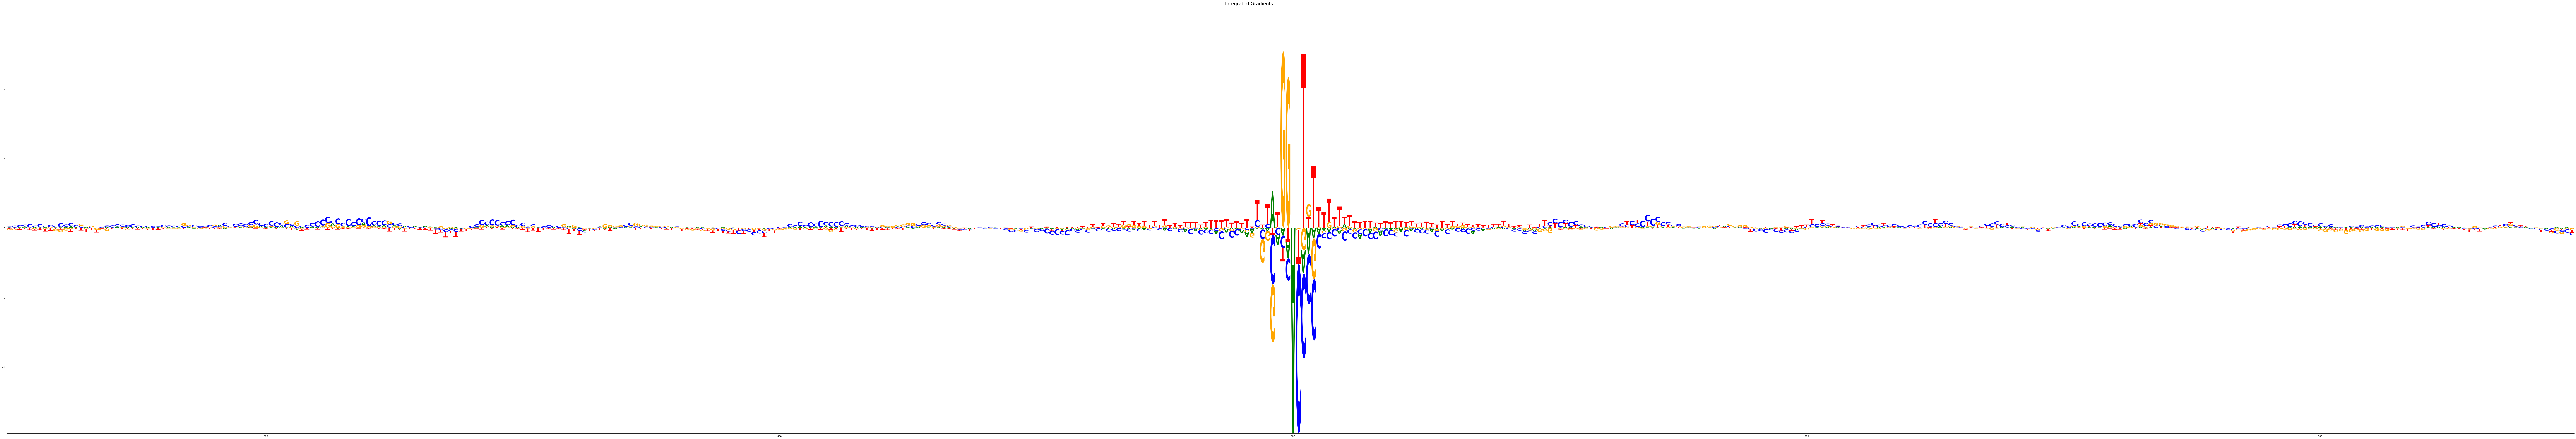

In [ ]:
fig = plt.figure(figsize=(200,30))
fig.suptitle("Integrated Gradients Control", fontsize=20)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax = fig.add_subplot(1, 1, 1)
logomaker.Logo(df.iloc[250:750,:], ax=ax, color_scheme='classic')
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_ticks_position("none")
plt.show()

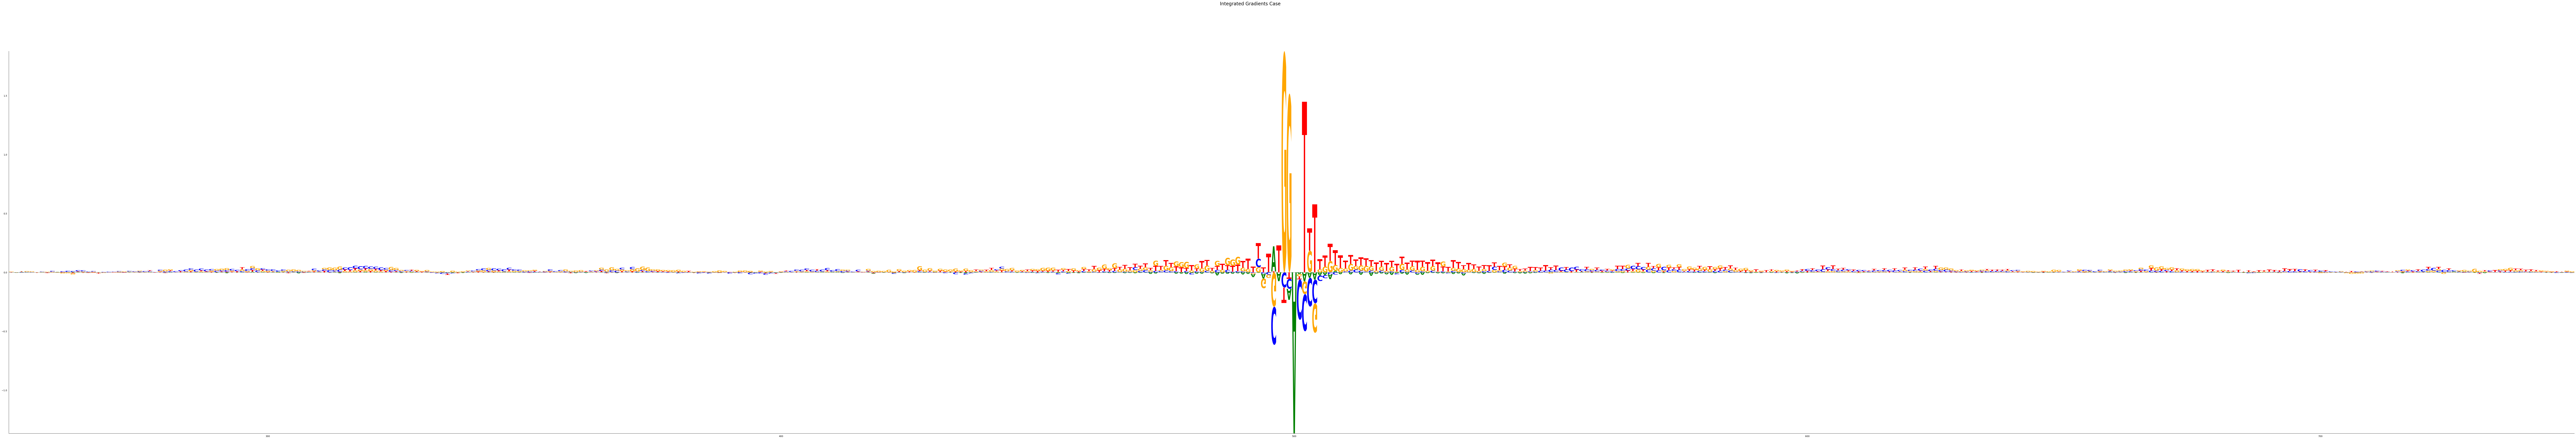

In [60]:
# Index = 1 -> case
# ~ 2 minutes
IG = random_baseline_integrated_gradients(inputs=top_100_case, model=model, index=1, steps=50, num_random_trials=10)

plot_matrix = np.average(np.multiply(top_100_case, IG), axis=0)
df = pd.DataFrame(plot_matrix.T, columns=list("ACGT"))
fig = plt.figure(figsize=(200,30))
fig.suptitle("Integrated Gradients Case", fontsize=20)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax = fig.add_subplot(1, 1, 1)
logomaker.Logo(df.iloc[250:750,:], ax=ax, color_scheme='classic')
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_ticks_position("none")
plt.show()

In [38]:
ig_captum = random_baseline_integrated_gradients(inputs=seq_fasta_one_hot[:10,:,:], model=model, index=0, steps=50, num_random_trials=10)

In [40]:
def calculate_outputs_and_gradients(inputs, model, index,cuda=False):
    # do the pre-processing
    predict_idx = None
    gradients = []
    n_steps = len(inputs)
    for i in range(n_steps):
        input = inputs[i]
        input.requires_grad = True
        input.retain_grad()
        output = model(input)
        # clear grad
        model.zero_grad()
        output[index].backward(retain_graph=True)
        gradient = input.grad.detach().cpu().numpy()[0]
        gradients.append(gradient)
    gradients = np.array(gradients)
    return gradients

# integrated gradients
def integrated_gradients(inputs, model, predict_and_gradients, baseline, index,steps=50, cuda=False):
    if baseline is None:
        baseline = 0 * inputs
    # scale inputs and compute gradients
    scaled_inputs = [baseline + (float(i) / steps) * (inputs - baseline) for i in range(0, steps + 1)]
    grads = predict_and_gradients(scaled_inputs, model, index, cuda)
    avg_grads = np.average(grads[:-1], axis=0)
    avg_grads = np.expand_dims(avg_grads, axis=0)
    inputs = inputs.cpu().numpy()
    baseline = baseline.cpu().numpy()
    integrated_grad = (inputs - baseline) * avg_grads
    return integrated_grad

def random_baseline_integrated_gradients(inputs, model, predict_and_gradients, index, steps, num_random_trials=10, cuda=True):
    all_intgrads = []
    length = inputs.shape[-1]        # input shape [1,4,length]
    mid = length // 2
    baseline = torch.cuda.FloatTensor(np.zeros(inputs.shape))
    # baseline[:,:,mid] = inputs[:,:,mid]
    for i in range(num_random_trials):
        integrated_grad = integrated_gradients(inputs, model, predict_and_gradients, \
                                                baseline=baseline, \
                                                index=index, steps=steps, cuda=cuda)
        all_intgrads.append(integrated_grad)
        # print('the trial number is: {}'.format(i))
    avg_intgrads = np.average(np.array(all_intgrads), axis=0)
    return avg_intgrads

In [ ]:
# one example from the med models, you can change the RBPname to see the attribution map of other RBPs in med models

X_test_seq = X_test_seq_med
X_test_region = X_test_region_med
y_test_RBP = y_test_RBP_med
RBPnames=RBPnames_med
pred=pred_med
igres=igres_med

RBPname="TARDBP"
RBP_index = np.where(RBPnames==RBPname)[0][0]
# Take the positive and with threshold > 0.5 
ind=[i[0] for i in sorted(enumerate(pred[:,RBP_index]), key=lambda x:x[1],reverse=True) if y_test_RBP[i[0],RBP_index]==1 and pred[i[0],RBP_index] > 0.50][0:3]
ex_seq=np.array([igres.explain([X_test_seq[i],X_test_region[i]],outc=RBP_index,reference=False)[0] for i in ind])

plt.close("all")
seqlogo_fig(np.transpose(ex_seq[:,25:125,:4],axes=(1,2,0)), vocab="RNA", figsize=(8,3), ncol=1)
plt.show()

In [ ]:
attributions = []
for j in range(len(multi_ind_high)):
    attribution = random_baseline_integrated_gradients(torch.unsqueeze(X[multi_ind_high[j],:],0), model, calculate_outputs_and_gradients, \
                                                        index = RM_index,steps=50, num_random_trials=10, cuda=None)
    attributions.append(attribution)
attributions = np.concatenate(attributions,0)

In [63]:
next(model.parameters()).device == torch.device("cpu")

True